<a href="https://colab.research.google.com/github/ahnjonghyunn/CapstoneDesign/blob/main/%EC%BA%A1%EC%8A%A4%ED%86%A4_%EC%A0%88%EB%8F%84_20%EA%B0%9C_%EC%A7%84%EC%A7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics
!pip install mediapipe
!pip install numpy pandas opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 이상행위 영상 분할


In [ ]:
import os
from moviepy.editor import VideoFileClip

def clip_videos(video_paths, abnormal_clip_dir, normal_clip_dir, abnormal_intervals_dict, clip_duration=10, fps=30):
    if not os.path.exists(abnormal_clip_dir):
        os.makedirs(abnormal_clip_dir)
    if not os.path.exists(normal_clip_dir):
        os.makedirs(normal_clip_dir)

    for video_path in video_paths:
        video = VideoFileClip(video_path)
        total_duration = int(video.duration)
        clip_count_abnormal = 0
        clip_count_normal = 0

        video_name = os.path.basename(video_path)
        abnormal_intervals = abnormal_intervals_dict.get(video_path, [])

        for start_time in range(0, total_duration, clip_duration):
            end_time = min(start_time + clip_duration, total_duration)
            clip = video.subclip(start_time, end_time)

            is_abnormal = any(start_time <= t < end_time for t in abnormal_intervals)
            if is_abnormal:
                clip_path = os.path.join(abnormal_clip_dir, f'abnormal_clip_{video_name}_{clip_count_abnormal}.mp4')
                clip_count_abnormal += 1
            else:
                clip_path = os.path.join(normal_clip_dir, f'normal_clip_{video_name}_{clip_count_normal}.mp4')
                clip_count_normal += 1

            clip.write_videofile(clip_path, codec="libx264", fps=fps)

video_paths = [
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도11.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도12.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도13.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도14.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도15.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도16.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도17.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도18.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도19.mp4',
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도20.mp4'
]

abnormal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos/abnormal'
normal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos/normal'

abnormal_intervals_dict = {
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도11.mp4': [10, 21, 43],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도12.mp4': [10, 21, 40],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도13.mp4': [10, 21, 41],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도14.mp4': [10, 39, 50],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도15.mp4': [10, 38, 49],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도16.mp4': [10, 39, 50],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도17.mp4': [10, 21, 43],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도18.mp4': [10, 22, 43],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도19.mp4': [10, 22, 40],
    '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도20/절도20.mp4': [10, 38, 49]
}

clip_videos(video_paths, abnormal_clip_dir, normal_clip_dir, abnormal_intervals_dict)


In [ ]:

# 비디오 클립 추출 사용 예제
#video_paths = [
   # '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도10/절도9.mp4',
   # '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도10/절도10.mp4'
#]
#abnormal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/abnormal'
#normal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/normal'
#bnormal_intervals_dict = {
  #  '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도10/절도9.mp4': [20, 31, 43],
   # '/content/drive/MyDrive/capstone_data/data/Training/source_data/test_절도10/절도10.mp4': [10, 21, 41]
#}

#clip_videos(video_paths, abnormal_clip_dir, normal_clip_dir, abnormal_intervals_dict)

#영상 확인 코드

In [ ]:
#from IPython.display import HTML
#from base64 import b64encode

#def display_videos(video_paths):
#    video_tags = ""
#    for video_path in video_paths:
        # 비디오 파일을 base64로 인코딩
#        video = open(video_path, "rb").read()
#        video_encoded = b64encode(video).decode("ascii")

        # HTML로 비디오 재생 태그 추가
#        video_tags += f"""
#        <video width="640" height="480" controls>
#            <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
#        </video>
#        <br>
#        """

#   return HTML(data=video_tags)

# 사용 예시
#video_paths = [
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/normal/normal_clip_절도9.mp4_0.mp4", #
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/normal/normal_clip_절도9.mp4_1.mp4", # 25
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/normal/normal_clip_절도9.mp4_2.mp4",
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/abnormal/abnormal_clip_절도9.mp4_0.mp4",#20
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/abnormal/abnormal_clip_절도9.mp4_0.mp4",# 31
#    "/content/drive/MyDrive/capstone_data/data/Training/clipped_videos_jong/abnormal/abnormal_clip_절도9.mp4_0.mp4",# 43
#
#]

#display_videos(video_paths)


#비디오 파일에서 랜드마크 추출

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import mediapipe as mp
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

# YOLOv8 모델 로드
model = YOLO('yolov8n.pt')

# MediaPipe 초기화
mp_pose = mp.solutions.pose

def detect_people(image):
    results = model(image)
    persons = []
    for det in results[0].boxes:
        if det.cls == 0:  # 0은 COCO dataset에서 사람을 의미
            persons.append(det.xyxy.cpu().numpy())
    return persons

def extract_landmarks(image, person_box):
    x_min, y_min, x_max, y_max = map(int, person_box[0])
    person_image = image[y_min:y_max, x_min:x_max]

    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(cv2.cvtColor(person_image, cv2.COLOR_BGR2RGB))
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            return [(lm.x, lm.y) for lm in landmarks]
        else:
            return None

def process_clips(clip_dir, max_landmarks_per_clip=500):
    clips = [os.path.join(clip_dir, clip) for clip in os.listdir(clip_dir) if clip.endswith('.mp4')]
    all_landmarks = []

    for clip_path in clips:
        cap = cv2.VideoCapture(clip_path)
        landmarks_count = 0
        while cap.isOpened() and landmarks_count < max_landmarks_per_clip:
            ret, frame = cap.read()
            if not ret:
                break
            people_boxes = detect_people(frame)
            for box in people_boxes:
                lm = extract_landmarks(frame, box)
                if lm:
                    all_landmarks.append(lm)
                    landmarks_count += 1
                    if landmarks_count >= max_landmarks_per_clip:
                        break
        cap.release()

    return all_landmarks

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.6MB/s]


#랜드마크 추출함수 실행

In [ ]:
abnormal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos/abnormal'
normal_clip_dir = '/content/drive/MyDrive/capstone_data/data/Training/clipped_videos/normal'

abnormal_landmarks = process_clips(abnormal_clip_dir)
normal_landmarks = process_clips(normal_clip_dir)


0: 384x640 2 persons, 1 donut, 498.7ms
Speed: 25.3ms preprocess, 498.7ms inference, 3321.0ms postprocess per image at shape (1, 3, 384, 640)


  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '



Streaming output truncated to the last 5000 lines.

0: 384x640 2 bottles, 224.2ms
Speed: 4.6ms preprocess, 224.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 bottles, 232.2ms
Speed: 4.3ms preprocess, 232.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 163.4ms
Speed: 6.9ms preprocess, 163.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 159.9ms
Speed: 4.2ms preprocess, 159.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 145.8ms
Speed: 5.6ms preprocess, 145.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 161.5ms
Speed: 4.6ms preprocess, 161.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 148.0ms
Speed: 5.2ms preprocess, 148.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 145.2ms
Speed: 4.1ms preproce

In [ ]:
print(f"Extracted abnormal landmarks: {len(abnormal_landmarks)}")
print(f"Extracted normal landmarks: {len(normal_landmarks)}")

Extracted abnormal landmarks: 25005
Extracted normal landmarks: 21961


#3. 데이터 패딩 및 준비

In [ ]:
from sklearn.model_selection import train_test_split  # train_test_split 임포트 추가
def pad_landmarks(landmarks, target_length):
    padded_landmarks = []
    for i, lm in enumerate(landmarks):
        if lm is None or len(lm) == 0:
            print(f"Invalid landmark found at index {i}")
            continue
        if len(lm) > target_length:
            lm = lm[:target_length]
        elif len(lm) < target_length:
            lm += [[0, 0]] * (target_length - len(lm))
        if len(lm) == target_length:
            padded_landmarks.append(lm)
        else:
            print(f"Landmark at index {i} has incorrect length after processing: {len(lm)}")
    print(f"Padded landmarks count: {len(padded_landmarks)}")
    return padded_landmarks

def prepare_data(abnormal_landmarks, normal_landmarks, sequence_length=10, test_size=0.2):
    print("Padding abnormal landmarks...")
    abnormal_landmarks = pad_landmarks(abnormal_landmarks, sequence_length)
    print("Padding normal landmarks...")
    normal_landmarks = pad_landmarks(normal_landmarks, sequence_length)

    abnormal_landmarks = [lm for lm in abnormal_landmarks if lm is not None and len(lm) == sequence_length]
    normal_landmarks = [lm for lm in normal_landmarks if lm is not None and len(lm) == sequence_length]

    X = abnormal_landmarks + normal_landmarks
    y = [1] * len(abnormal_landmarks) + [0] * len(normal_landmarks)

    print(f"Valid abnormal landmarks after padding: {len(abnormal_landmarks)}")
    print(f"Valid normal landmarks after padding: {len(normal_landmarks)}")
    print(f"Total valid landmarks: {len(X)}")

    if len(X) == 0 or len(y) == 0:
        raise ValueError("No valid data found after filtering None and invalid sequences.")

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

    train_dataset = LandmarkDataset(X_train, y_train)
    val_dataset = LandmarkDataset(X_val, y_val)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    return train_loader, val_loader

class LandmarkDataset(Dataset):
    def __init__(self, landmarks, labels):
        self.landmarks = landmarks
        self.labels = labels

    def __len__(self):
        return len(self.landmarks)

    def __getitem__(self, idx):
        return torch.tensor(self.landmarks[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)

sequence_length = 10
try:
    train_loader, val_loader = prepare_data(abnormal_landmarks, normal_landmarks, sequence_length)
    print(f"Train DataLoader created with {len(train_loader.dataset)} samples.")
    print(f"Validation DataLoader created with {len(val_loader.dataset)} samples.")
except ValueError as e:
    print(e)


Padding abnormal landmarks...
Padded landmarks count: 25005
Padding normal landmarks...
Padded landmarks count: 21961
Valid abnormal landmarks after padding: 25005
Valid normal landmarks after padding: 21961
Total valid landmarks: 46966
Training samples: 37572, Validation samples: 9394
Train DataLoader created with 37572 samples.
Validation DataLoader created with 9394 samples.


#LSTM 모델 정의

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def calculate_accuracy(outputs, labels):
    preds = torch.sigmoid(outputs) > 0.5
    correct = (preds == labels).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(2, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

def train_model(num_epochs, train_loader, val_loader, criterion, learning_rate=0.0005):
    model = LSTMModel(input_size, hidden_size, output_size, num_layers, dropout)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        running_train_accuracy = 0.0
        for i, (landmarks, labels) in enumerate(train_loader):
            landmarks, labels = landmarks.to(torch.float32), labels.to(torch.float32)

            outputs = model(landmarks).squeeze()
            labels = labels.squeeze()

            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            running_train_accuracy += calculate_accuracy(outputs, labels).item()

        model.eval()
        running_val_loss = 0.0
        running_val_accuracy = 0.0
        with torch.no_grad():
            for i, (landmarks, labels) in enumerate(val_loader):
                landmarks, labels = landmarks.to(torch.float32), labels.to(torch.float32)

                outputs = model(landmarks).squeeze()
                labels = labels.squeeze()

                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                running_val_accuracy += calculate_accuracy(outputs, labels).item()

        train_loss = running_train_loss / len(train_loader)
        val_loss = running_val_loss / len(val_loader)
        train_accuracy = running_train_accuracy / len(train_loader)
        val_accuracy = running_val_accuracy / len(val_loader)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return model, train_losses, val_losses, train_accuracies, val_accuracies

## LSTM 모델 학습

In [ ]:
input_size = 2
hidden_size = 64
output_size = 1
num_layers = 2
dropout = 0.5

num_epochs = 50

criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.0005

model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(num_epochs, train_loader, val_loader, criterion, learning_rate)

torch.save(model.state_dict(), '/content/drive/MyDrive/capstone_data/data/models/이상감지_모델_절도_20.pth')


Epoch [1/50], Loss: 0.6914, Validation Loss: 0.6909, Train Accuracy: 0.5310, Validation Accuracy: 0.5325
Epoch [2/50], Loss: 0.6908, Validation Loss: 0.6918, Train Accuracy: 0.5326, Validation Accuracy: 0.5406
Epoch [3/50], Loss: 0.6909, Validation Loss: 0.6906, Train Accuracy: 0.5337, Validation Accuracy: 0.5356
Epoch [4/50], Loss: 0.6905, Validation Loss: 0.6899, Train Accuracy: 0.5355, Validation Accuracy: 0.5360
Epoch [5/50], Loss: 0.6872, Validation Loss: 0.6811, Train Accuracy: 0.5444, Validation Accuracy: 0.5516
Epoch [6/50], Loss: 0.6794, Validation Loss: 0.6778, Train Accuracy: 0.5645, Validation Accuracy: 0.5661
Epoch [7/50], Loss: 0.6743, Validation Loss: 0.6686, Train Accuracy: 0.5768, Validation Accuracy: 0.5863
Epoch [8/50], Loss: 0.6699, Validation Loss: 0.6659, Train Accuracy: 0.5809, Validation Accuracy: 0.5763
Epoch [9/50], Loss: 0.6685, Validation Loss: 0.6639, Train Accuracy: 0.5848, Validation Accuracy: 0.5888
Epoch [10/50], Loss: 0.6667, Validation Loss: 0.6623, T

# 손실 및 정확도 그래프 그리기

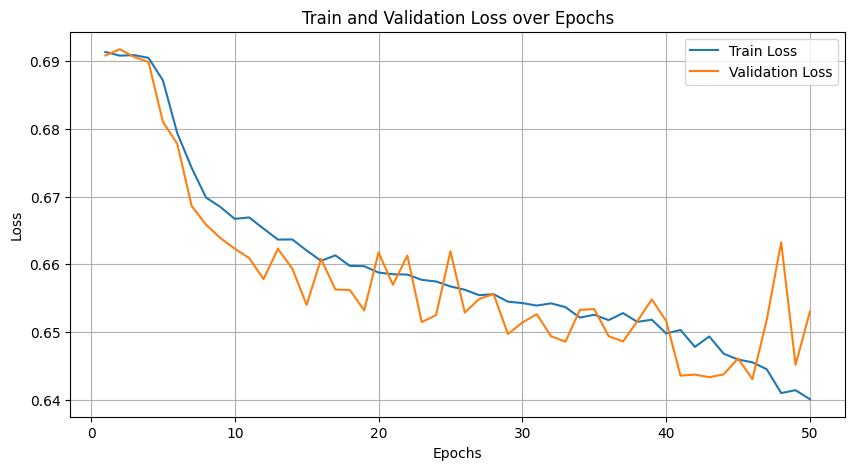

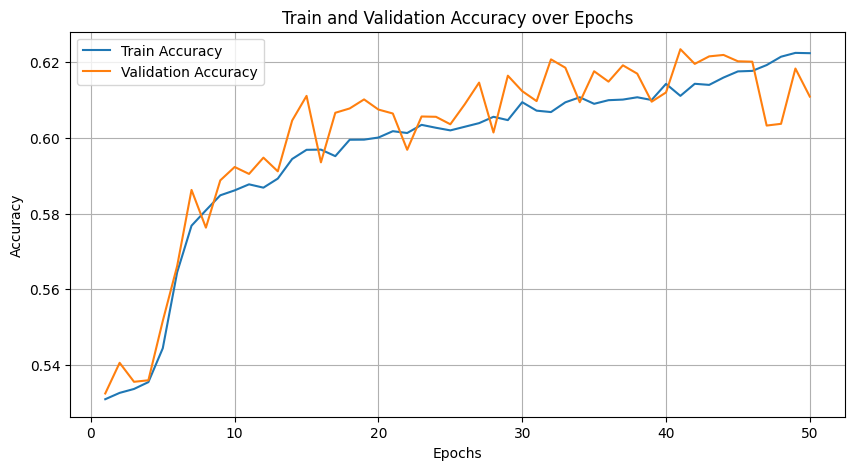

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 정확도 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()
